# Data source information
The source of dataset https://www.kaggle.com/datasets/shivamb/netflix-shows

# Introduction

The dataset contains information about Netflix releases, including their type, rating, release date, director, actors, duration, etc. 

Question I am going to answer with this analysis:
* Is Netflix focused more on TV Shows or movies in recent years?* 
Which rating is the most popular among the movies/ shows?* 
Which movie genre is worth investing i
* Does the duration of the movie matter?
* What is the correlation between the duration and the release year?
* Who is the most popular director within Netflix releases?
* Which countries are producing the most content? Which director within top 3 countries is the most fruitful? 

These questions can provide insight into Netlix's characteristics and can be explored using data analysis and visualization techniques.  Python packages such as pandas, matplotli, and seaborn can be used for data analysis and visualization.

# Reading Data in Dataframe

In [61]:
import pandas as pd
import numpy as np
df = pd.read_csv('./netflix_titles.csv')

# Exploratory Data Analysis

In [64]:
# Display the first 5 rows of the DataFrame
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## Data Cleaning and Preprocessing

   - Check for missing values and handle them appropriately.
   - Check for any duplicate entries and remove them if necessary.
   - Convert data types if needed (e.g. converting 'date' to datetime type, 'release year' to numeric type).
   - Extract minutes from the 'duration' column 
   - Extract month and year from the 'date_added' column for time-based analysis
   - Handling missing values
   - For categorical columns 'rating', 'duration' and 'country', filling missing values with a 
placeholdee "Unknown
   -  Check for and remove any duplicate entries
   -  Investigate and handle any outliers in columns

In [68]:
# Converting a column 'date_added' to datetime format
df['date_added'] = pd.to_datetime(df['date_added'],format='mixed')

In [71]:
# Extract month and year from the ' date_added' column
df['year'] = df['date_added'].dt.year
df['month'] = df['date_added'].dt.month

In [73]:
# Checking if there are missing values in new columns
mis_year = df['year'].isnull().sum()
mis_month = df['month'].isnull().sum()
print( f' There are {mis_year} missing values in "year" column \
and {mis_month} missing values in "month" column')

 There are 10 missing values in "year" column and 10 missing values in "month" column


In [75]:
# Dropping rows with Nan in 'year' and 'month' columns
df = df.dropna(subset=['year', 'month'], axis=0)

# Converting 'year' and 'month' columns to integers
df[['year', 'month']] = df[['year', 'month']].astype(int)

# Checking if there are missing values
missing_values = df['release_year'].isnull().sum()
print(f' There are {missing_values} missing values in "release_year" \
column.')

 There are 0 missing values in "release_year" column.


In [77]:
# Extract numbers from the 'duration' column and converting them to integers
df['duration_min'] = df['duration'].str.replace(" min", "")
df['duration_min'] = df['duration_min'].str.replace(" Season", "").str.replace(" Seasons", "").str.replace("s", "").fillna(0).astype(int)

# Create column with minutes only for Movies
film_msk = df['type'] == 'Movie'
film_msk
df['duration_min_movie'] = df.loc[film_msk]['duration_min']

In [79]:
# filling missing values with a placeholder "Unknown"
df['rating'] = df['rating'].fillna('Unknown')
df['duration'] = df['duration'].fillna('Unknown')
df['country']= df['country'].fillna('Unknown origin')

In [81]:
# Checking duplicates 
duplicates = df.duplicated().sum()
print(f' There are {duplicates} duplicates.')

 There are 0 duplicates.


## Summary Statistics
   - Identifying outliers for 'release_year' column
  - Calculate basic summary statistics such as mean, median, standard deviation, and range for numerical columns like release year, year, month
  

In [84]:
# Calculate basic summary statistics for numerical columns: release_year, year, month, duration_min_movie
numerical_columns_summary = df[['release_year', 'year', 'month', 'duration_min_movie']].describe()
numerical_columns_summary

,release_year,year,month,duration_min_movie
count,8797.000000,8797.000000,8797.000000,6131.000000
mean,2014.183472,2018.871888,6.654996,99.528462
std,8.822191,1.574243,3.436554,28.369284
min,1925.000000,2008.000000,1.000000,0.000000
25%,2013.000000,2018.000000,4.000000,87.000000
50%,2017.000000,2019.000000,7.000000,98.000000
75%,2019.000000,2020.000000,10.000000,114.000000
max,2021.000000,2021.000000,12.000000,312.000000


In [86]:
## Identifying outliers

# calculate IQR for column release_year
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
df_no_outliers = df[(df['release_year'] > (Q1 - 1.5 * IQR)) & (df['release_year'] < (Q3 + 1.5 * IQR))]

In [88]:
# Display the statistics for a data frame without outliers
df_no_outliers[['release_year', 'year', 'month', 'duration_min_movie']].describe()

,release_year,year,month,duration_min_movie
count,8016.000000,8016.000000,8016.000000,5432.000000
mean,2016.406687,2018.858034,6.634107,97.518962
std,3.636685,1.552268,3.412352,26.934955
min,2005.000000,2008.000000,1.000000,0.000000
25%,2015.000000,2018.000000,4.000000,86.000000
50%,2017.000000,2019.000000,7.000000,97.000000
75%,2019.000000,2020.000000,10.000000,112.000000
max,2021.000000,2021.000000,12.000000,312.000000


In [90]:
# Counting median for seasons in TV series 

#creating mask for TV Shows only
msk_shows = df['type'] == 'TV Show'

# Extracting number of seasons
series = df.loc[msk_shows, 'duration'].str.split(' ', n=2, expand = True)

# Display median of seasons 
median_of_seasons = series[0].median()
print(f' The median for seasons of all TV Series is {median_of_seasons}')

 The median for seasons of all TV Series is 1.0


# Data Visualisation

   - Create visualizations to understand the distribution of TV shows and movies popularity using a box plot
   - Use bar plot to show the number of TV shows and movies released
   - Use bar plot to identify 10 most popular movie types
   - Display top 10 countries providing most releases
   - Plot the distribution between movie duration and release year using scatter plots
   - Create a horizontal bar plot to identify top 15 directors producing the biggest amount of movies
   - Visualize top 3 directors within top 3 countries providing most releases
   - Use bar plots to show the number of each movie genres
   
### Visualization 1: Distribution of TV shows and movies

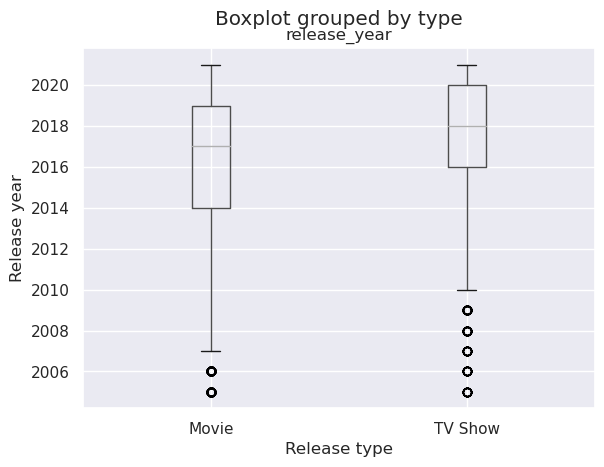

In [93]:
import seaborn as sns
sns.set(palette='deep')
import matplotlib.pyplot as plt

# Box Plot of TV shows and Movies
df_no_outliers.boxplot(by='type', column = 'release_year',\
                       ylabel = 'Release year',
                      xlabel='Release type',
                     );

Most titles available are recent releases.
75% of movies added to Netflix are from 2014 onwards. 
75% of TV shows are from 2016 onwards.


### Visualization 2. Number of TV shows and movies released

<Axes: xlabel='type', ylabel='Count'>

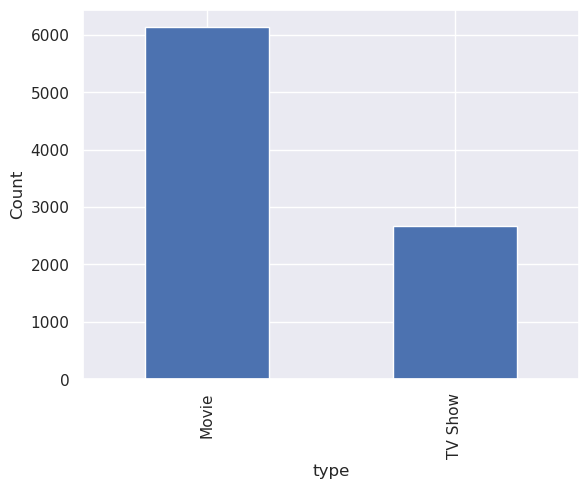

In [97]:
#bar plot to show the number of TV shows and movies released
df['type'].value_counts().plot(kind='bar',
                              ylabel = 'Count')

The majority of Netflix content are movies. The number of TV Shows is less than a half of the movies.

### Visualization 3. Type of content added to Netflix over time

<Axes: title={'center': 'Type of content added to Netflix over time'}, xlabel='Year when added', ylabel='Number of releases'>

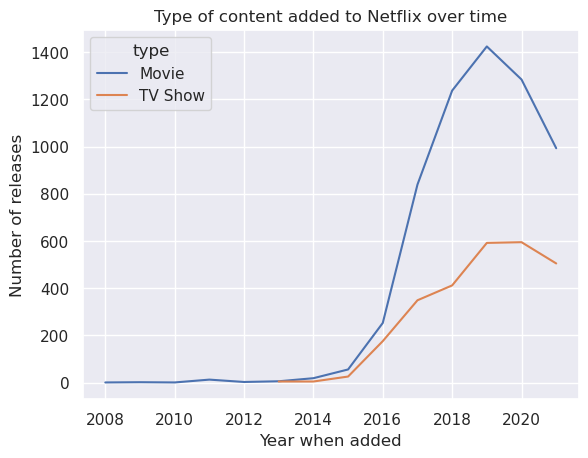

In [101]:
# Line plot showing popularity of content over years
type_plot = df.groupby('type')[['year']].value_counts().reset_index().pivot(index='year', columns='type', values='count') # Have to reset index and pivot as functions cannot work on a Series
type_plot.plot(kind='line', title='Type of content added to Netflix over time',\
               ylabel = 'Number of releases',
              xlabel = 'Year when added')

Movies appear to be the main focus of Netflix uploads. Noticeable steep rise in all content until 2019. Recent decline in amount of content available may be caused by COVID pandemic. 


### Visualization 4. Popularity of top 10 movie ratings

<Axes: title={'center': 'Releases count according to the rating'}, xlabel='Number of releases', ylabel='Rating type'>

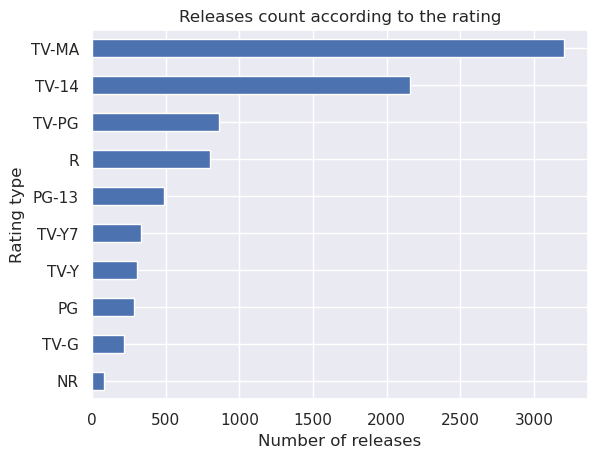

In [105]:
# Plot top 10 releases ratings with a horizontal bar plot
df['rating'].value_counts().head(10).sort_values().plot(kind='barh',
                                         xlabel = 'Number of releases',
                                         ylabel = 'Rating type',
                                         title = 'Releases count according to the rating')

The majority of releases are for mature (TV-MA) or teen audiences (TV-14), followed by parental guidance (TV-PG) and restricted (R) productions.

### Visualization 5. Top 10 countries with the most content

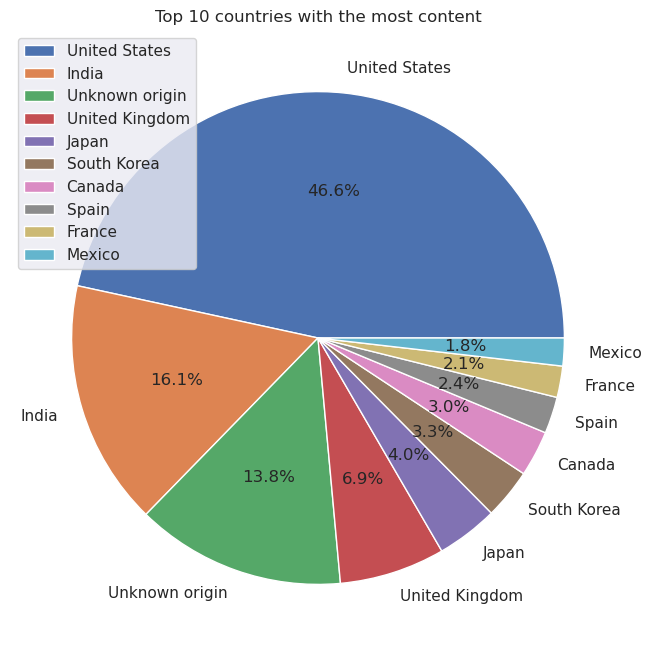

In [109]:
# Plot a pie chart identifying top 10 countries with the most content
plt.figure(figsize=(8, 8))
plt.pie(df['country'].value_counts().head(10), labels=df['country'].value_counts().head(10).index, autopct='%1.1f%%')
plt.title('Top 10 countries with the most content')
plt.legend(loc='upper left')
plt.show()


United States is the biggest producer of content, followed by India, UK and countries listed as 'unknown'.

### Visualization 6. Number of each movie genre

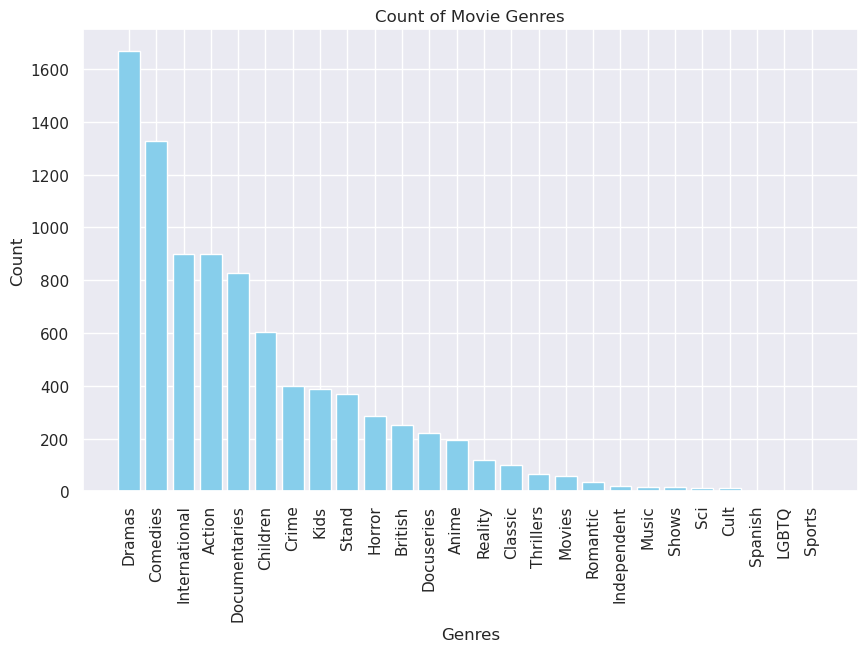

In [113]:
# Number of each movie genre - bar plot

# Extract each genre from multiple entries and transform data
movie= df.copy()
movie['genres'] = movie['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)
genre_counts_movie = movie['genres'].value_counts().reset_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(genre_counts_movie['genres'], genre_counts_movie['count'], color='skyblue')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Movie Genres')
plt.xticks(rotation=90)
plt.show()


Learning from the bar plot, the top 5 popular movie genres are: Dramas, Comedies, International, Action, Documentaries. 
There is a great number of genres which are not so numerous, such as Sports, LGBTQ, Spanish, Cults, Science. 

### Visualization 7. Correlation between release year and duration

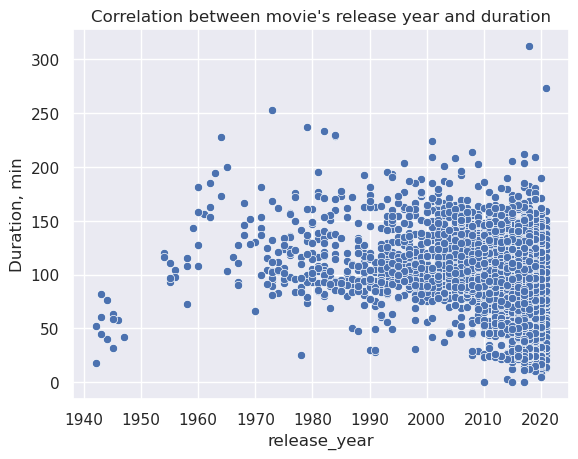

In [117]:
# Set the new data frame containing only Movie
movie_df = df[df['type'] == 'Movie']

# Scatter plot showing correlation between release year and duration
sns.scatterplot(data = movie_df, 
                x='release_year', 
                y='duration_min')
plt.ylabel("Duration, min")
plt.title("Correlation between movie's release year and duration")
plt.show()

The biggest amount of movies were released after 2014. The duration of productions differs, however usually they don't last longer than 114 min.

### Visualization 8. Most popular movie directors

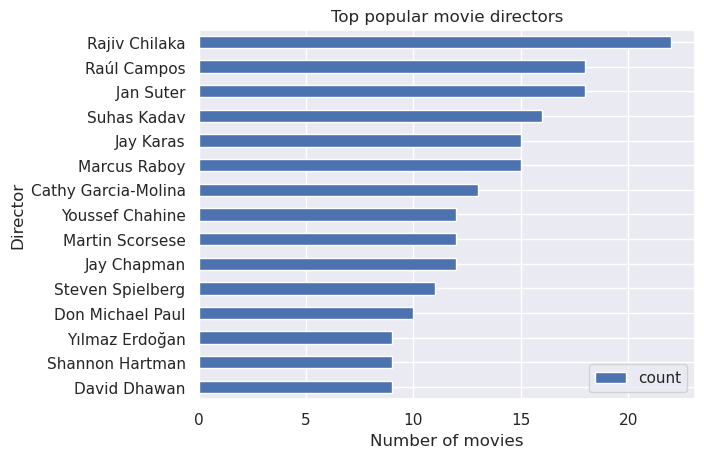

In [121]:
# Create a series with top 15 movie directors from all countries

# Create a mask for movies only
msk_movie = df['type'] == 'Movie'

# Split directors to separate names
movies = df.loc[msk_movie, 'director'].str.split(',', n=2, expand = True).stack()
new_movies = movies.to_frame().reset_index(drop=True)

# Displaying top 15 directors - horizontal bar plot 
new_movies[0].value_counts().head(15).to_frame().sort_values(by='count').plot(kind='barh',
                                                                              ylabel = 'Director', 
                                                                              xlabel= 'Number of movies', 
                                                                              title = 'Top popular movie directors');

The plot shows which directors within all countries are the most popular ones and the number of productions they delivered. 



### Visualization 9. Most popular movie directors within top 3 countries

In [125]:
# Creating most popular directors for United States, India and 'Unknown' (as per pie chart)
new_df=df.copy()
# Top 3 directors from United States - creating mask
us_mask = new_df['country'] == 'United States'
# Splitting directors to separate names within the mask
us_directors = new_df[us_mask]['director'].value_counts().head(3).to_frame()
us_directors = us_directors.reset_index()
us_directors['country'] = 'United States'

# Top 3 directors from India - creating mask
india_mask = new_df['country'] == 'India'
# Splitting directors to separate names within the mask
india_directors = new_df[india_mask]['director'].value_counts().head(3).to_frame()
india_directors = india_directors.reset_index()
india_directors['country'] = 'India'

# Top 3 directors from unknown countries - creating mask
unknown_mask = new_df['country'] == 'Unknown'
# Splitting directors to separate names within the mask
unknown_directors = new_df[unknown_mask]['director'].value_counts().head(3).to_frame()
unknown_directors = unknown_directors.reset_index()
unknown_directors['country'] = 'Unknown'

# Combine above data frames into one
top3_countries = pd.concat([us_directors, india_directors, unknown_directors]).sort_values(by='count', ascending = False)

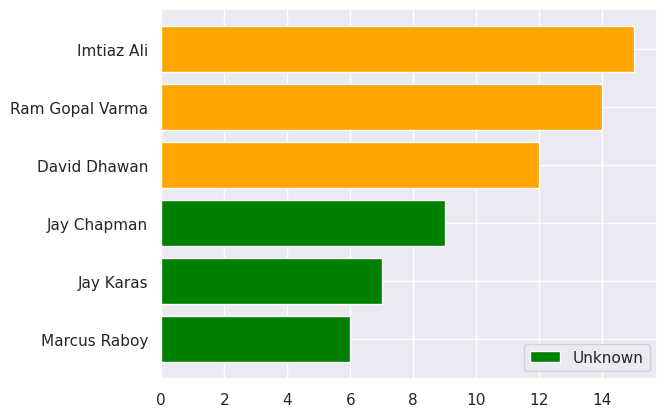

In [127]:
# Show top 3 directors for United States, India and unknown countries

# Establish color for each country
origin_colors = {'United States':'green', 'India': 'orange', 'Unknown': 'blue'}
top3_countries['color_column'] = [origin_colors[x] for x in top3_countries['country']]

# Plot horizontal bar chart
fig, ax = plt.subplots()
ax.barh(top3_countries['director'], top3_countries['count'].sort_values(), color=top3_countries['color_column'])
ax.legend(['Unknown', 'United States', 'India'])
plt.show()

The plot show the directors from top 3 countries and number of his productions. United States is in green, India in orange and unknown countries in blue.

# Conclusion & recommendations 

Netflix provides huge amount of data regarding its releases. Most of the TV Shows and Movies are relatively new ones and released after 2014. The analysis reveals that the content base consists of 70% of movies and 30% of TV Shows. Usually, the duration of the movie doesn't exceed 114 min. Year 2019 was a breaking point when number of productions added to streaming service declined which may have opened new opportunities for competitors to enter the market. As per ratings, the most popular ones are TV-MA, TV-14, TV-PG, R, which may be a direction to follow. Similarly, knowing the most and least popular movie genres may suggest to either follow the main trend or focus on the genres with the lowest amount of productions to fill the market gap. It may be beneficial to focus on movies and TV shows directed by the most prolific directors. The analysis shows countries where the most movies are produced: United States, India, unknown countries, United Kingdom. Even though some countries are marked as 'Unknown' they play important role in this analysis which may be seen when analyzing top 3 directors from top 3 countries. Prakash Satam, the second most popular director, is associated with the country of the unknown origin. 